# 1. Bakery Transaction - EDA

베이커리 판매 데이터의 탐색적 분석<br>
Edinburgh, Scotland 베이커리의 판매 데이터 [Kaggle - Transaction from a bakery](https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery)

<br>

**분석 목표**
- 베이커리 판매에 영향을 주는 요인 찾기
- 베이커리 판매량 예측하기
- 세트 상품으로 출시하면 좋을 조합 제안하기

<br>

---

<br>

[1. Introduction](##1.-Introduction) <br>
[2. Exploration](##2.-Exploration) <br>
　[2-1. 베이커리 판매량의 추이](###2-1.-베이커리-판매량의-추이)<br>
　[2-2. 베이커리의 베스트 셀러 Top 10](###2-2.-베이커리의-베스트-셀러-Top-10)<br>
　[2-3. 베스트 셀러의 시간대별 판매량 추이](###2-3.-베스트-셀러의-시간대별-판매량-추이)<br>

## 1. Introduction

베이커리 판매 데이터
- 2016년 10월 30일부터 2017년 4월 9일까지의 판매 데이터
- 총 21293개의 관측치
- 결측치 값은 NONE으로 설정
- 4개의 변수

| 변수명 | 변수 설명 | 자료 형태 |
|  :----------------------------: |  :----------------------------: |  :----------------------------: |
| Date | 거래일 | 날짜(YYYY-MM-DD) |
| Time | 거래시간 | 시간(HH:MM:DD) |
| Transaction | 거래번호 | 거래의 일련번호 |
| Item | 판매품목 | 상품명 |

**필요한 라이브러리 불러오기**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import matplotlib.pyplot as plt

**데이터 확인하기**

In [2]:
bakery = pd.read_csv('../input/transactions-from-a-bakery/BreadBasket_DMS.csv')
bakery.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
bakery.shape

(21293, 4)

In [4]:
bakery.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [5]:
bakery['Item'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
Polenta              1
Raw bars             1
Adjustment           1
Olum & polenta       1
Name: Item, Length: 95, dtype: int64

**결측치 확인하고 처리하기**

결측치가 있는 행은 전체 삭제하여 처리해준다
- 결측치가 Na나 빈 값이 아니라 None으로 되어 있으므로 그에 맞게 처리
- 총 786개의 데이터 삭제

In [6]:
bakery[bakery['Item'] == 'NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [7]:
bakery = bakery[bakery['Item'] != 'NONE']
bakery[bakery['Item'] == 'NONE']

,Date,Time,Transaction,Item


**데이터 타입 변환**

날짜의 요일을 확인하기 위해 object 타입의 날짜와 시간을 datetime 타입으로 변환

날짜 시간 데이터에서 요일 추출해서 열 추가: `dt.weekday_name() 대신 day_name()사용`

In [8]:
bakery['Date_Time'] = pd.to_datetime(bakery['Date']+' '+bakery['Time'],format="%Y/%m/%d %H:%M:%S")
bakery['Day_of_Week'] = bakery['Date_Time'].dt.day_name()
bakery.head()

,Date,Time,Transaction,Item,Date_Time,Day_of_Week
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,Sunday
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,Sunday


## 2. Exploration

### 2-1. 베이커리 판매량의 추이

**날짜 별 판매량 추이**

In [9]:
bakery['Date'].value_counts().head()

2017-02-04    292
2016-11-05    275
2017-03-04    257
2017-03-25    246
2017-01-28    237
Name: Date, dtype: int64

날짜 별로 묶어주기

In [10]:
bakery['Date'].value_counts().max()
bakery['Date'].value_counts().index[0]

'2017-02-04'

In [11]:
bakery['Date'].value_counts().min()
bakery['Date'].value_counts().index[-1]

'2017-01-01'

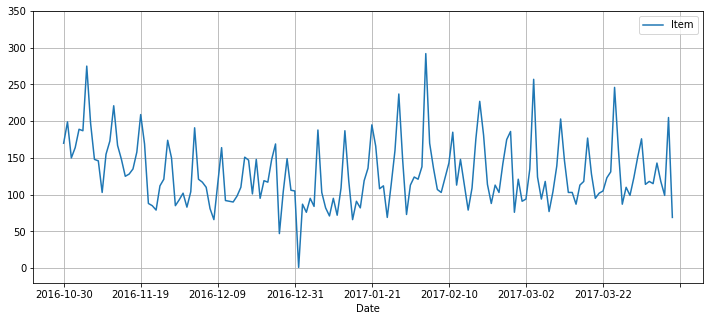

In [12]:
graph1 = bakery.groupby('Date')['Item'].count()

graph1.plot(figsize=(12,5))
plt.ylim([-20,350])
plt.grid(True)
plt.legend()

In [13]:
bakery['Month'] = bakery['Date_Time'].dt.month
bakery['Year'] = bakery['Date_Time'].dt.year
bakery.head()

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Year
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday,10,2016
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,2016
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,2016
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,Sunday,10,2016
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,Sunday,10,2016


In [14]:
bakery.groupby("Month")["Year"].apply(lambda x: x[x==2016].count()).max(), bakery.groupby("Month")["Year"].apply(lambda x: x[x==2017].count()).max()

(4436, 3944)

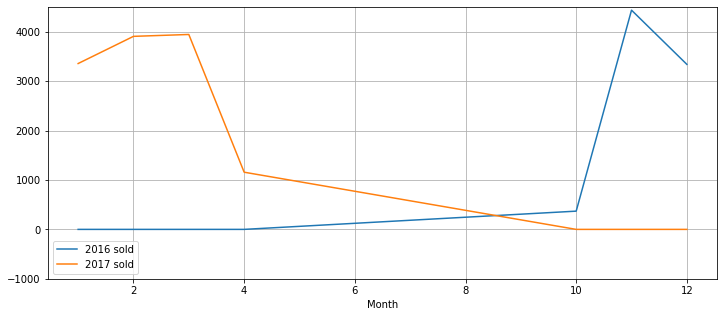

In [15]:
TC = bakery.groupby("Month")["Year"].apply(lambda x: x[x==2016].count()).rename("2016 sold").to_frame()
TC["2017 sold"] = bakery.groupby("Month")["Year"].apply(lambda x: x[x==2017].count())

TC.plot(figsize=(12,5))
plt.ylim([-1000,4500])
plt.grid(True)
plt.legend()

**요일 별 판매량 추이**

In [16]:
bakery['Day_of_Week'].value_counts()

Saturday     4605
Friday       3124
Sunday       3095
Thursday     2646
Tuesday      2392
Monday       2324
Wednesday    2321
Name: Day_of_Week, dtype: int64

<AxesSubplot:xlabel='Day_of_Week', ylabel='count'>

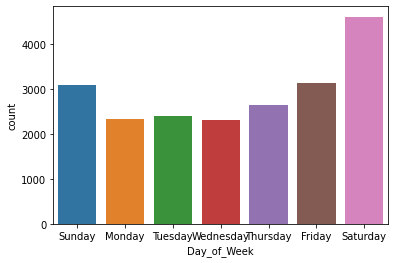

In [17]:
sns.countplot(x = 'Day_of_Week', data = bakery)

**시간대 별 판매량 추이**

In [18]:
bakery['Time'].value_counts()

12:07:39    16
14:38:01    13
10:45:21    13
10:55:19    13
13:43:08    12
            ..
15:25:58     1
13:15:53     1
13:21:36     1
14:26:29     1
09:10:07     1
Name: Time, Length: 8197, dtype: int64

In [19]:
bakery['Hour'] = bakery['Date_Time'].dt.hour
bakery.head()

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Year,Hour
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday,10,2016,9
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,2016,10
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,2016,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,Sunday,10,2016,10
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,Sunday,10,2016,10


In [20]:
bakery['Hour'].max(), bakery['Hour'].min()

(23, 1)

<AxesSubplot:xlabel='Hour', ylabel='count'>

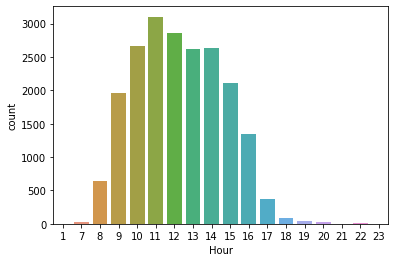

In [21]:
sns.countplot(x = 'Hour', data = bakery)

In [22]:
time_dict = {7 : 'Morning', 8 :'Morning', 9 :'Morning',10:'Morning',11:'Morning',12:'Morning',13:'Afternoon',14:'Afternoon',15:'Afternoon',16:'Afternoon',17:'Afternoon',18:'Afternoon',19:'Evening',20:'Evening',21:'Evening',22:'Evening',23:'Evening'}
bakery['Session'] = bakery['Hour'].map(time_dict)
bakery.head()

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Year,Hour,Session
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday,10,2016,9,Morning
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,2016,10,Morning
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,2016,10,Morning
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,Sunday,10,2016,10,Morning
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,Sunday,10,2016,10,Morning


<AxesSubplot:xlabel='Session', ylabel='count'>

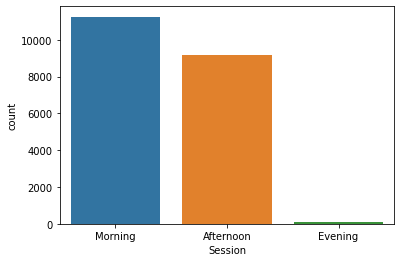

In [23]:
sns.countplot(x = 'Session', data = bakery)

### 2-2. 베이커리의 베스트 셀러 Top 10

In [24]:
bakery['Item'].value_counts().iloc[:10]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

<AxesSubplot:xlabel='Item', ylabel='count'>

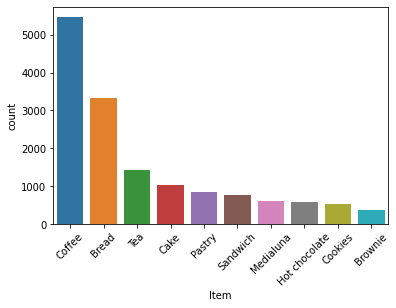

In [25]:
plt.xticks(rotation=45)
sns.countplot(x = 'Item', data = bakery, order = bakery['Item'].value_counts().iloc[:10].index)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  if __name__ == '__main__':


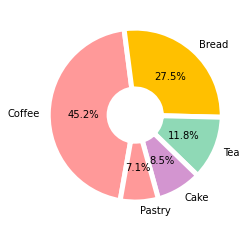

In [26]:
labels = bakery['Item'].value_counts().iloc[:5].index
values = bakery['Item'].value_counts().iloc[:5].values

ratio = values / sum(values)
ratio
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

### 2-3. 베스트 셀러의 판매량 추이

베스트 셀러: Coffee, Bread, Tea, Cake, Pastry

**Coffee의 판매량 추이**

In [27]:
bakery["Date"].value_counts()

2017-02-04    292
2016-11-05    275
2017-03-04    257
2017-03-25    246
2017-01-28    237
             ... 
2017-01-25     69
2017-01-16     66
2016-12-08     66
2016-12-27     47
2017-01-01      1
Name: Date, Length: 159, dtype: int64

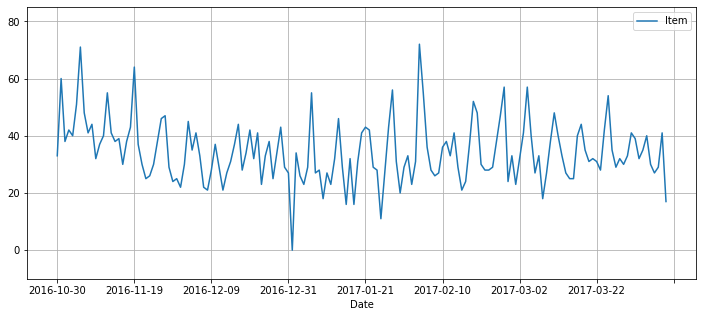

In [28]:
graph = bakery.groupby('Date')['Item'].apply(lambda x: x[x=="Coffee"].count())

graph.plot(figsize=(12,5))
plt.ylim([-10,85])
plt.grid(True)
plt.legend()

Text(0, 0.5, 'Coffee')

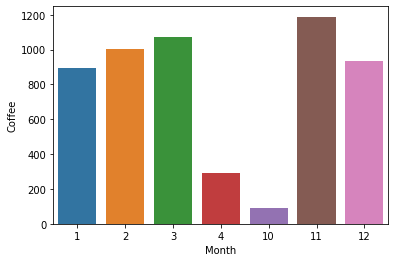

In [29]:
# .reset_index()로 인덱스를 붙여줘야 sns.barplot를 그릴 수 있다
# sns.countplot(bakery.groupby('Month')['Item'].apply(lambda x: x[x=="Coffee"].count()))도 가능
coffee_month = bakery.groupby('Month')['Item'].apply(lambda x: x[x=="Coffee"].count()).reset_index()
graph = sns.barplot(data=coffee_month, x="Month", y="Item")
graph.set_ylabel('Coffee')

Text(0, 0.5, 'Coffee')

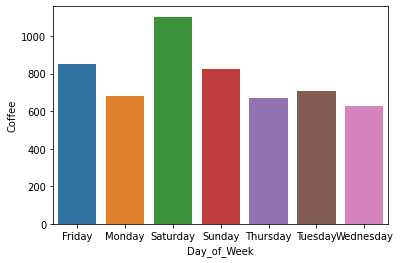

In [30]:
coffee_day = bakery.groupby('Day_of_Week')['Item'].apply(lambda x: x[x=="Coffee"].count()).reset_index()
graph = sns.barplot(data=coffee_day, x="Day_of_Week", y="Item")
graph.set_ylabel('Coffee')

In [31]:
# 요일 순서를 내 마음대로: reindex
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
coffee_day = bakery.groupby('Day_of_Week')['Item'].apply(lambda x: x[x=="Coffee"].count()).reindex(days)
coffee_day = coffee_day.reset_index()

Text(0, 0.5, 'Coffee')

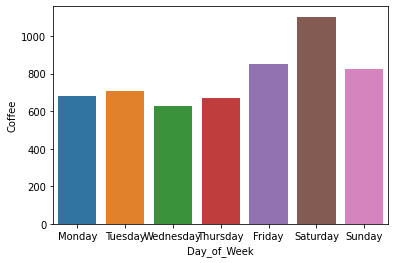

In [32]:
graph = sns.barplot(data=coffee_day, x="Day_of_Week", y="Item")
graph.set_ylabel('Coffee')

Text(0, 0.5, 'Coffee')

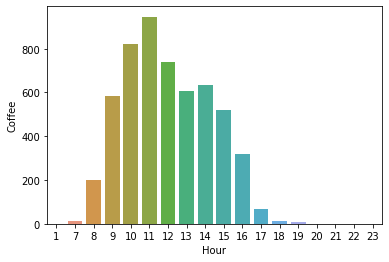

In [33]:
coffee_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Coffee"].count()).reset_index()
graph = sns.barplot(data=coffee_day, x="Hour", y="Item")
graph.set_ylabel('Coffee')

**Bread의 판매량 추이**

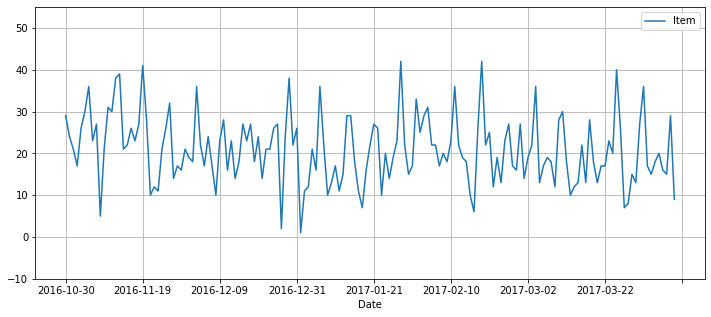

In [34]:
graph = bakery.groupby('Date')['Item'].apply(lambda x: x[x=="Bread"].count())

graph.plot(figsize=(12,5))
plt.ylim([-10,55])
plt.grid(True)
plt.legend()

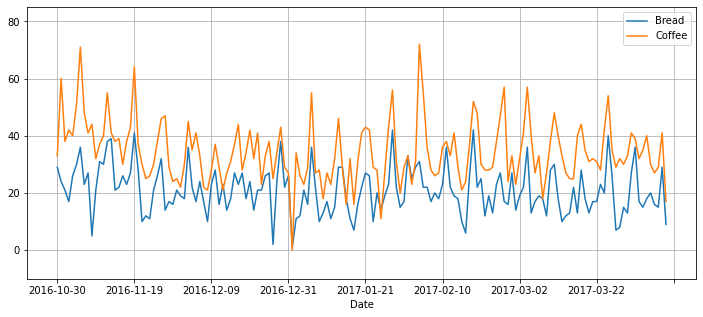

In [35]:
TC = bakery.groupby('Date')['Item'].apply(lambda x: x[x=="Bread"].count()).rename("Bread").to_frame()
TC["Coffee"] = bakery.groupby("Date")["Item"].apply(lambda x: x[x=="Coffee"].count())

TC.plot(figsize=(12,5))
plt.ylim([-10,85])
plt.grid(True)
plt.legend()

Text(0, 0.5, 'Bread')

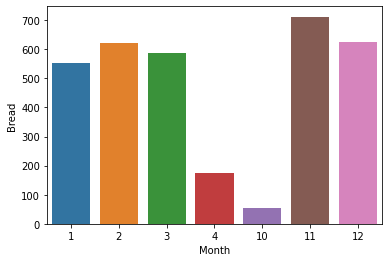

In [36]:
bread_month = bakery.groupby('Month')['Item'].apply(lambda x: x[x=="Bread"].count()).reset_index()
graph = sns.barplot(data=bread_month, x="Month", y="Item")
graph.set_ylabel('Bread')

Text(0, 0.5, 'Bread')

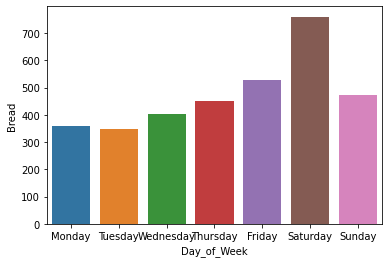

In [37]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
bread_day = bakery.groupby('Day_of_Week')['Item'].apply(lambda x: x[x=="Bread"].count()).reindex(days).reset_index()
graph = sns.barplot(data=bread_day, x="Day_of_Week", y="Item")
graph.set_ylabel('Bread')

Text(0, 0.5, 'Bread')

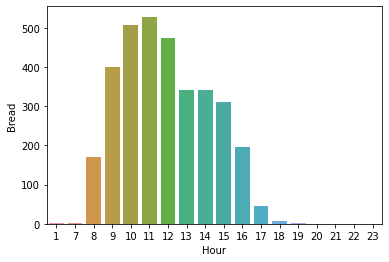

In [38]:
bread_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Bread"].count()).reset_index()
graph = sns.barplot(data=bread_day, x="Hour", y="Item")
graph.set_ylabel('Bread')

**Tea의 판매량 추이**

Text(0, 0.5, 'Tea')

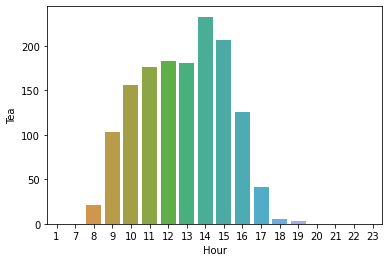

In [39]:
tea_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Tea"].count()).reset_index()
graph = sns.barplot(data=tea_day, x="Hour", y="Item")
graph.set_ylabel('Tea')

**Cake의 판매량 추이**

Text(0, 0.5, 'Cake')

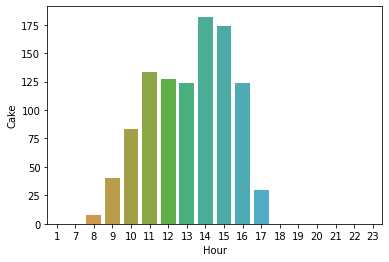

In [40]:
cake_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Cake"].count()).reset_index()
graph = sns.barplot(data=cake_day, x="Hour", y="Item")
graph.set_ylabel('Cake')

**Pastry의 판매량 추이**

Text(0, 0.5, 'Pastry')

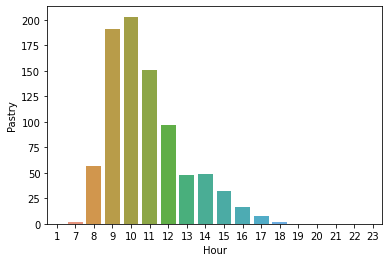

In [41]:
pastry_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Pastry"].count()).reset_index()
graph = sns.barplot(data=pastry_day, x="Hour", y="Item")
graph.set_ylabel('Pastry')

In [42]:
bakery.to_pickle('new_bakery.pkl')

---

- 2016년 10월 30일부터 2017년 4월 9일까지의 판매 데이터가 제공된다
- 5월부터 9월까지의 데이터는 제공되지 않으므로 계절 또는 월 별 비교 데이터가 부족하다.
- 베이커리는 총 95개의 상품을 판매하고 있으며 주 7일 영업을 하고 있다.

<br>

- 일일 최대 판매량은 292개로, 2017년 2월 4일이었으며 최소 판매량은 1개로, 2017년 1월 1일이었다.
- 가장 많이 팔린 품목은 커피, 빵, 티, 케이크, 페스츄리, 샌드위치, 크루와상, 핫초콜릿, 쿠키, 브라우니 순이다.
- 일주일 중 토요일이 가장 바쁘며 수요일이 가장 한가하다.
- 가장 바쁜 시간대는 10:00 ~ 14:00 이며 전반적으로는 아침 시간대에 판매량이 많다.

<br>

- 베스트셀러 Top5 중 1위인 커피의 점유율은 45.2% 이며 판매량은 11월과 토요일에 가장 높고 10월과 수요일에 가장 낮습니다. 10:00 ~ 12:00 시간대에 가장 판매량이 높다.
- 베스트셀러 Top5 중 2위인 빵의 판매량은 11월과 토요일에 가장 높고 10월과 화요일에 가장 낮습니다. 10:00 ~ 12:00 시간대에 가장 판매량이 높다.
- 베스트셀러 Top5 중 3위인 티는 13:00 ~ 15:00 시간대에 가장 판매량이 높다. 
- 베스트셀러 Top5 중 4위인 케이크는 14:00 ~ 16:00 시간대에 가장 판매량이 높다.
- 베스트셀러 Top5 중 5위인 페스츄리는 9:00  ~ 11:00 시간대에 가장 판매량이 높다. 

  ▶ 점심 혹은 점심 전후의 티타임에 전반적으로 판매량이 높은 것으로 추정된다.